                       ** KNN PREDICTIVE ALGORITHM ***
     ** BIG MART DATA **
 Reading the data in python

Defining the problem statement

Identifying the Target variable

Looking at the distribution of Target variable

Basic Data exploration

Rejecting useless columns

Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)

Feature Selection based on data distribution

Outlier treatment

Missing Values treatment
Statistical correlation analysis (Feature Selection)

Converting data to numeric for ML

Sampling and K-fold cross validation

Trying multiple classification algorithms

Selecting the best Model

Deploying the best model in production                      

In [1]:
#Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
import pandas as pd
import numpy as np
TrainData=pd.read_csv('E:/Documents/Personal Learning/AI Undergrad 2023/Lectures/Big Mart Sales/Train.csv', encoding='latin')
print('Shape before deleting duplicate values:', TrainData.shape)


Shape before deleting duplicate values: (8523, 12)


In [3]:
# Removing duplicate rows if any
TrainData=TrainData.drop_duplicates()
print('Shape After deleting duplicate values:', TrainData.shape)

Shape After deleting duplicate values: (8523, 12)


In [4]:
# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
TrainData.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


Defining the problem statement:
Create a Predictive model which can tell Item_Outlet_Sales for different types of stores?

Target Variable: Item_Outlet_Sales

Predictors: Item_Weight to Outlet_Type.

Item_Outlet_Sales=numerical, continous variable


Determining the type of Machine Learning

Based on the problem statement, we need to create a supervised ML regression model, as the target variable is continous.

################################################################################################

###################### EXPLORING THE DISTRIBUTION OF VARIABLES  #######

Looking at the distribution of Target variable

If target variable's distribution is too skewed then the predictive modeling will not be possible.

Bell curve is desirable but slightly positive skew or negative skew is also fine

When performing Regression SL, make sure there is a balance in the the distribution of the data points otherwise it impacts the 
Machine Learning algorithms ability to learn all the classes

<AxesSubplot: ylabel='Frequency'>

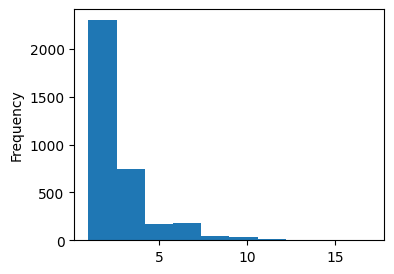

In [7]:
%matplotlib inline
# Creating histogram as the Target variable is continous
GroupedData=TrainData.groupby('Item_Outlet_Sales').size()
GroupedData.plot(kind='hist', figsize=(4,3))

 ******************   BASIC DATA EXPLORATION **********************

In [8]:
# Looking at sample rows in the data
TrainData.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
TrainData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [10]:
# Looking at the descriptive statistics of the data
TrainData.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [11]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
TrainData.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

Removing useless variables from data

In [12]:
# Deleting those columns which are not useful in predictive analysis because these variables are qualitative
UselessColumns = ['Item_Identifier', 'Outlet_Identifier']
TrainData = TrainData.drop(UselessColumns,axis=1)
TrainData.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


######################################################################################################

######    Visual Exploratory Data Analysis
Categorical variables: Bar plot ()

Continuous variables: Histogram


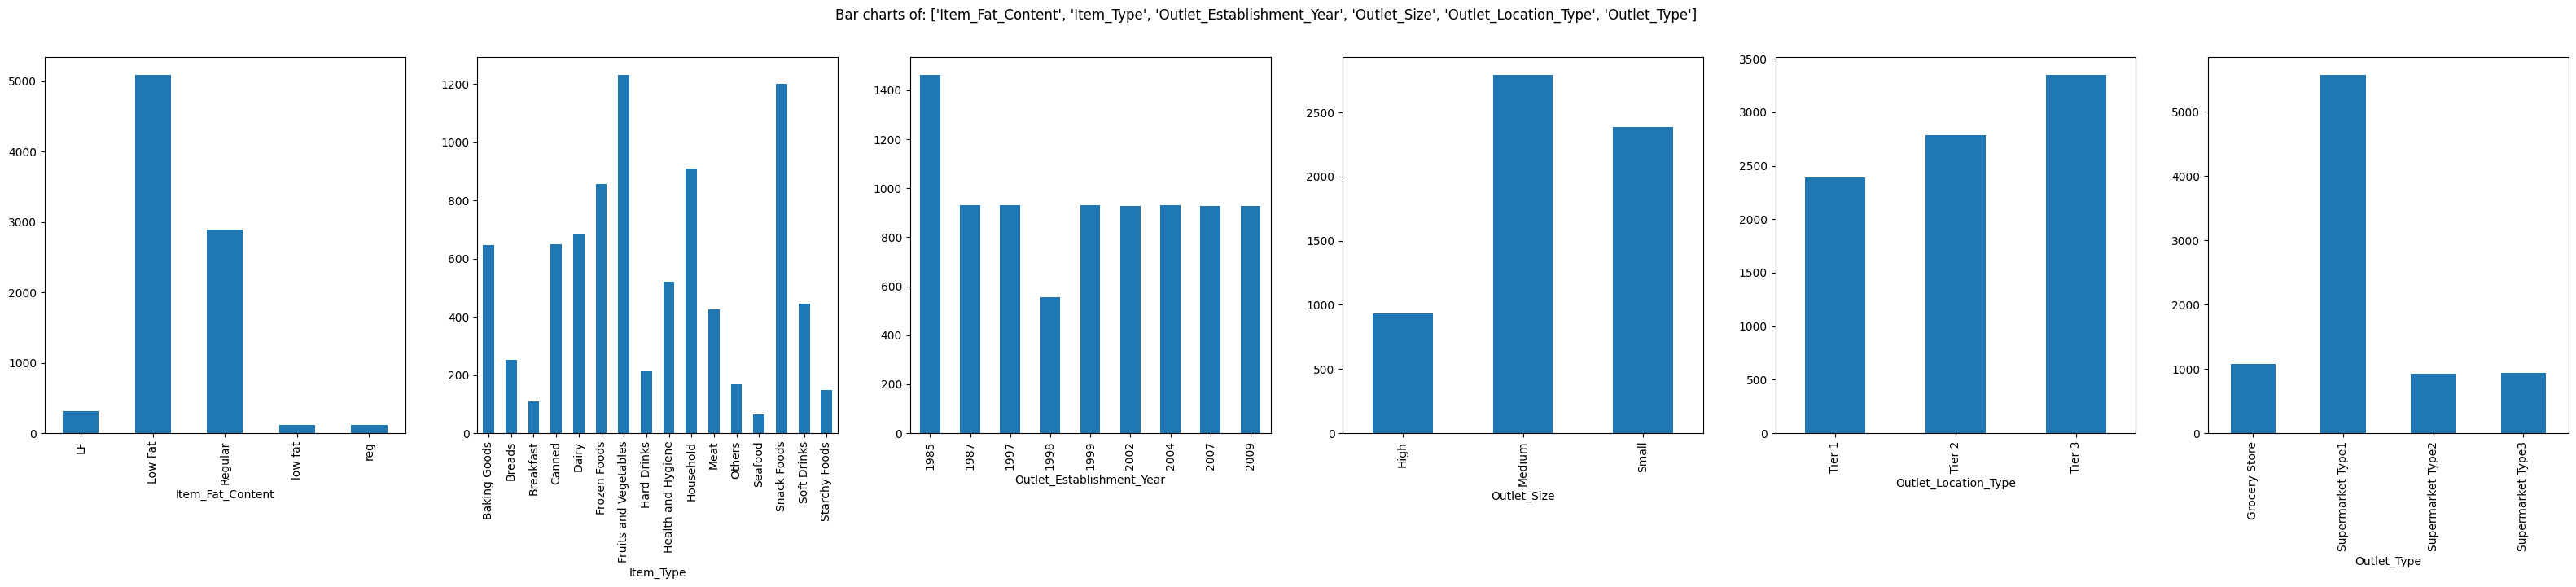

In [13]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(40,6))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

#####################################################################
# Calling the function
PlotBarCharts(inpData=TrainData, colsToPlot=['Item_Fat_Content', 'Item_Type', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type','Outlet_Type'])

Bar Charts Interpretation
These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

The ideal bar chart looks like the chart of "Outlet_Establishment_Year" column. Where each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

If there is a column which shows too skewed distribution like "Outlet_Type" where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

In this data, all the categorical columns except "Outlet_Type" have satisfactory distribution for machine learning

Visualize distribution of all the Continuous Predictor variables in the data using histograms

Based on the Basic Data Exploration, The continuous predictor variables 'Item_Weight', 'Item_Visibility', 'Item_MRP'


array([[<AxesSubplot: title={'center': 'Item_Weight'}>,
        <AxesSubplot: title={'center': 'Item_Visibility'}>],
       [<AxesSubplot: title={'center': 'Item_MRP'}>, <AxesSubplot: >]],
      dtype=object)

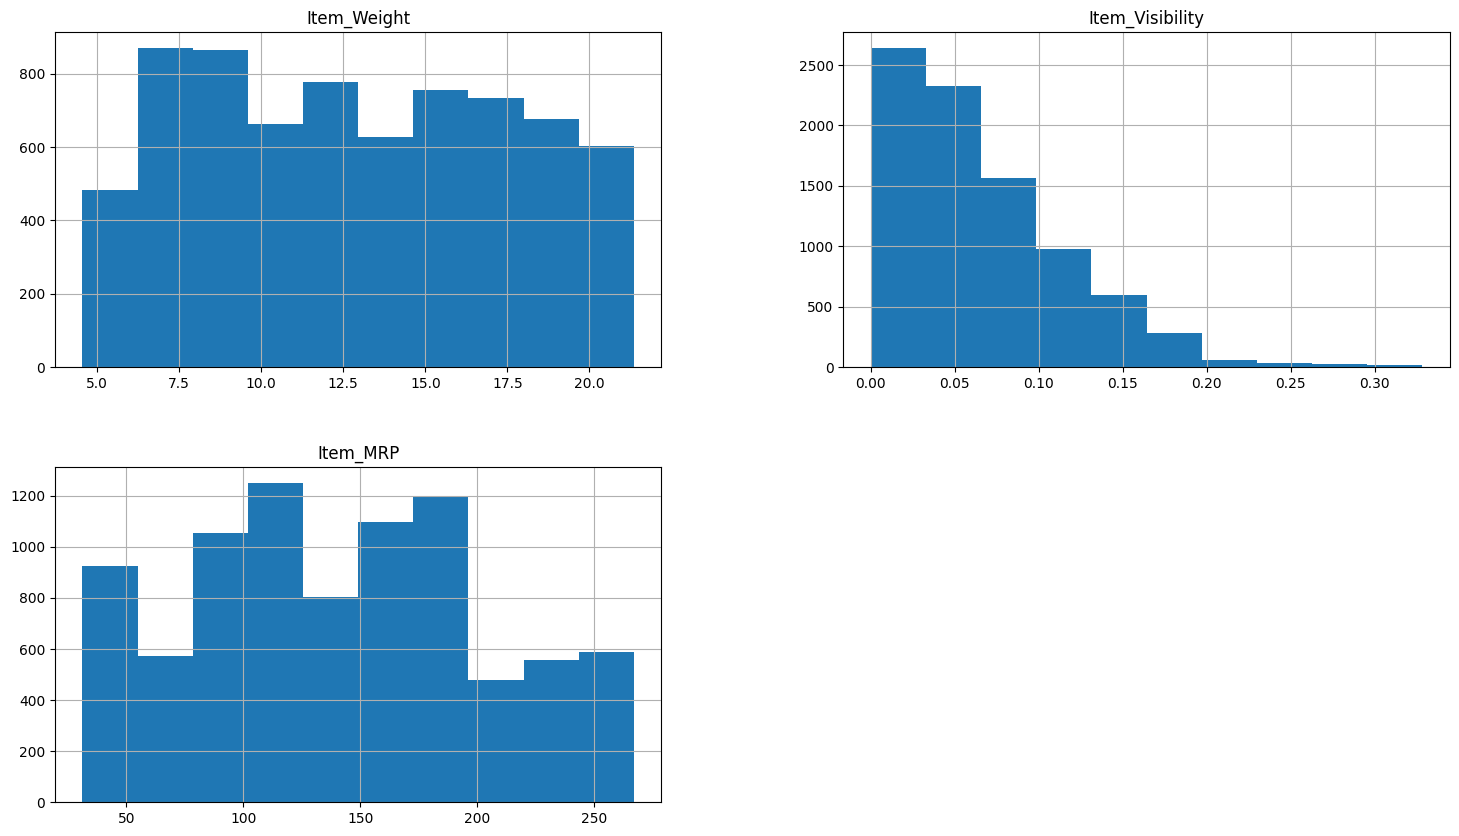

In [15]:
# Plotting histograms of multiple columns together
# Observe that Item_Visibility has outliers
TrainData.hist(['Item_Weight', 'Item_Visibility','Item_MRP'], figsize=(18,10))

Histogram Interpretation
Histograms shows us the data distribution for a single continuous variable.

The X-axis shows the range of values and Y-axis represent the number of values in that range. 

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

Selected Continuous Variables:

Item_Weight : Slightly skwed, acceptable.

Item_Visibility: Selected. Outliers seen beyond 0.20, need to treat them.

Item_MRP: Selected. Slightly skewed distribution, acceptable.

Outlier treatment

In [17]:
#Replacing outliers for 'Item_Visibility'
# Finding nearest values to 0.20 mark
TrainData['Item_Visibility'][TrainData['Item_Visibility']>0.18].sort_values()

3216    0.180097
1839    0.180588
3408    0.180821
5599    0.181114
2675    0.181769
          ...   
2855    0.309390
7250    0.311090
1805    0.321115
3750    0.325781
854     0.328391
Name: Item_Visibility, Length: 228, dtype: float64

Above result shows the nearest logical value is 0.181769, hence, replacing any value above 0.20 with it.

In [19]:
# Replacing outliers with nearest possibe value
TrainData['Item_Visibility'][TrainData['Item_Visibility']>0.20] = 0.181769

Visualizing distribution after outlier treatment

array([[<AxesSubplot: title={'center': 'Item_Visibility'}>]], dtype=object)

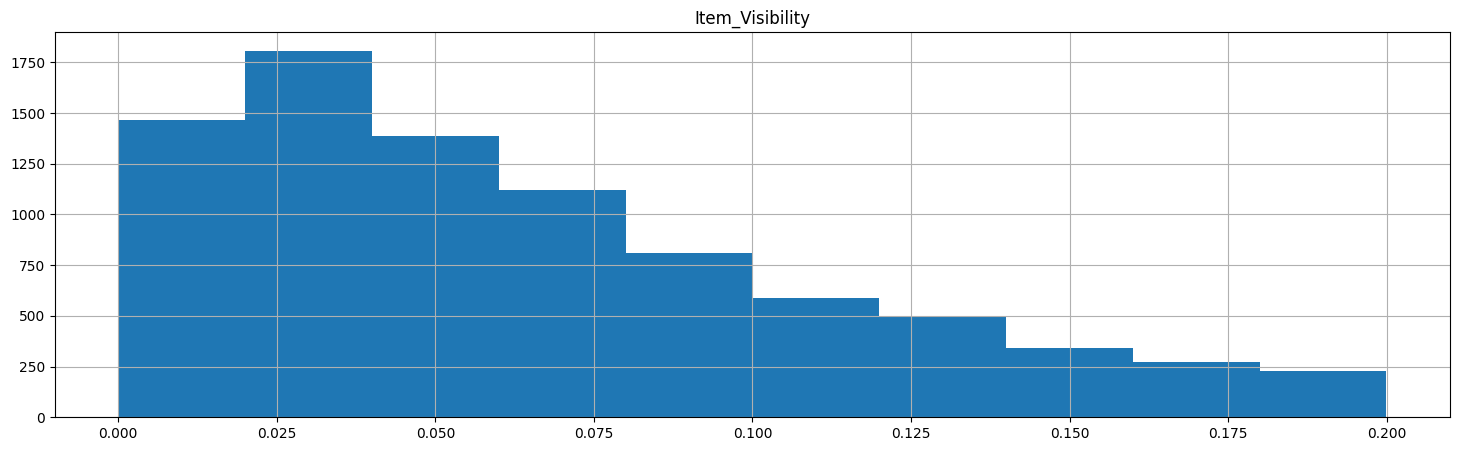

In [20]:
TrainData.hist(['Item_Visibility'], figsize=(18,5))

Missing values treatment

Missing values are treated for each column separately.

If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.

There are below options for treating missing values in data.

Delete the missing value rows if there are only few records

Impute the missing values with MEDIAN/MEAN value for continuous variables (MEDIAN for normally distributed data, MEAN for skewed data)

Impute the missing values with MODE value for categorical variables

Interpolate the values based on nearby values

Interpolate the values based on business logic

In [21]:
# Finding how many missing values are there for each column
TrainData.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There's missing data for Item_Weight and Outlet_Size.
Luckily, this is not more than 30% of the total data
So we can treat the missing data using median for Item_Weight and mode for Outlet_Size

In [22]:
# Imputing the missing values
# Using MODE for categorical columns
TrainData['Outlet_Size'].fillna(TrainData['Outlet_Size'].mode()[0], inplace=True)

In [23]:
# Using Median value for continuous columns
TrainData['Item_Weight'].fillna(TrainData['Item_Weight'].median(), inplace=True)

In [24]:
# Checking missing values again after the treatment
TrainData.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

####################################################################################

Feature Selection

Choose the best columns(Features) which are correlated to the Target variable. This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

Visual exploration of relationship between variables

Continuous Vs Continuous ---- Scatter Plot

Categorical Vs Continuous---- Box Plot

Categorical Vs Categorical---- Grouped Bar Plots

Statistical measurement of relationship strength between variables

Continuous Vs Continuous ---- Correlation matrix

Categorical Vs Continuous---- ANOVA test

Categorical Vs Categorical--- Chi-Square test

In this case study the Target variable is categorical, hence below two scenarios will be present

Continuous Target Variable Vs Continuous Predictor

Continuous Target Variable Vs Categorical Predictor

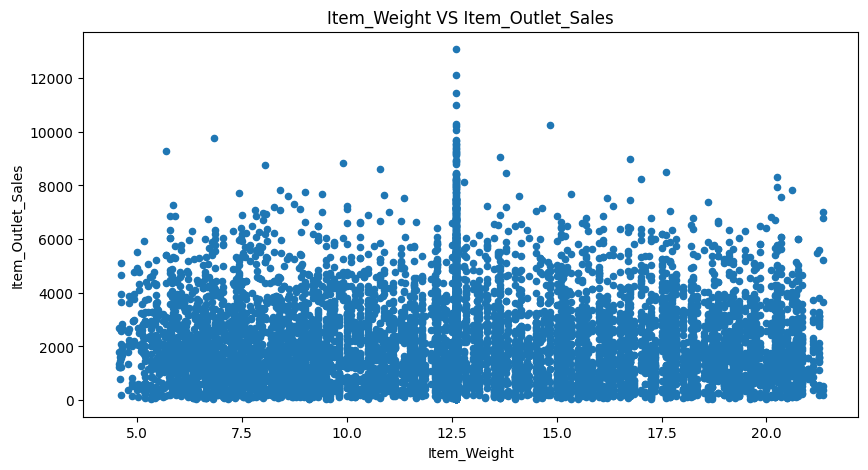

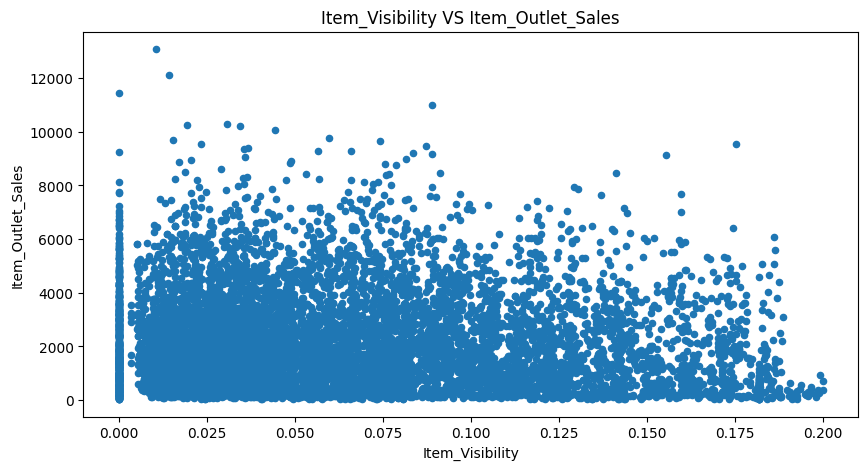

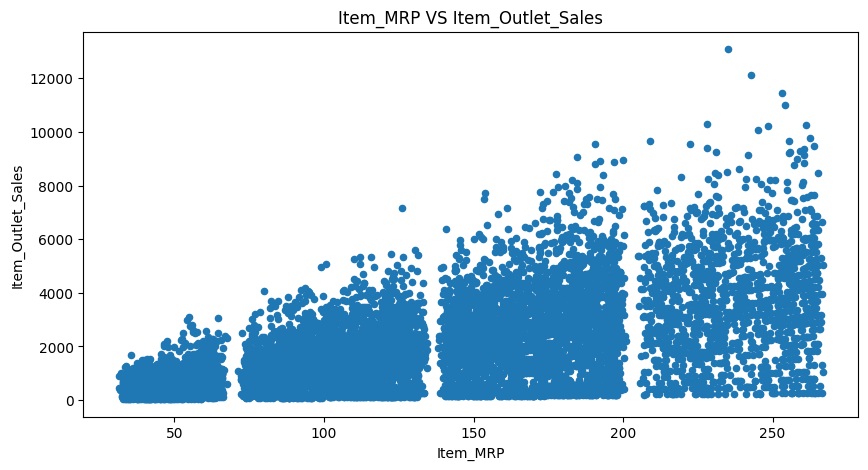

In [30]:
# Scatter plots for Continuous Target Variable "Item_Outlet_Sales" and continuous predictors
ContinuousColsList=['Item_Weight','Item_Visibility', 'Item_MRP']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousColsList:
    TrainData.plot.scatter(x=predictor, y='Item_Outlet_Sales', figsize=(10,5), title=predictor+" VS "+ 'Item_Outlet_Sales')

Scatter charts interpretation


Trend. You should try to see if there is a visible trend or not. There could be three scenarios

Increasing Trend: This means both variables are positively correlated. In simpler terms, they are directly proportional to each other, if one value increases, other also increases. This is good for ML! (E.g. Item_MRP)

Decreasing Trend: This means both variables are negatively correlated. In simpler terms, they are inversely proportional to each other, if one value increases, other decreases. This is also good for ML! (E.g. Item_Visibility)

No Trend: You cannot see any clear increasing or decreasing trend. This means there is no correlation between the variables. Hence the predictor cannot be used for ML. (E.g. Item_Weight)

Based on this chart you can get a good idea about the predictor, if it will be useful or not. You confirm this by looking at the correlation value.

In [31]:
# Calculating correlation matrix
ContinuousCols=['Item_Outlet_Sales', 'Item_Weight', 'Item_Visibility', 'Item_MRP']

# Creating the correlation matrix
CorrelationData=TrainData[ContinuousCols].corr()
CorrelationData

,Item_Outlet_Sales,Item_Weight,Item_Visibility,Item_MRP
Item_Outlet_Sales,1.000000,0.009693,-0.114342,0.567574
Item_Weight,0.009693,1.000000,-0.013185,0.024951
Item_Visibility,-0.114342,-0.013185,1.000000,-0.001166
Item_MRP,0.567574,0.024951,-0.001166,1.000000


From the above, the continuous variables Item_MRP, Item_Visibility are chosen for ML

In [32]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['Item_Outlet_Sales'][abs(CorrelationData['Item_Outlet_Sales']) > 0.1 ]

Item_Outlet_Sales    1.000000
Item_Visibility     -0.114342
Item_MRP             0.567574
Name: Item_Outlet_Sales, dtype: float64

Relationship exploration: Categorical Vs Continuous -- Box Plots

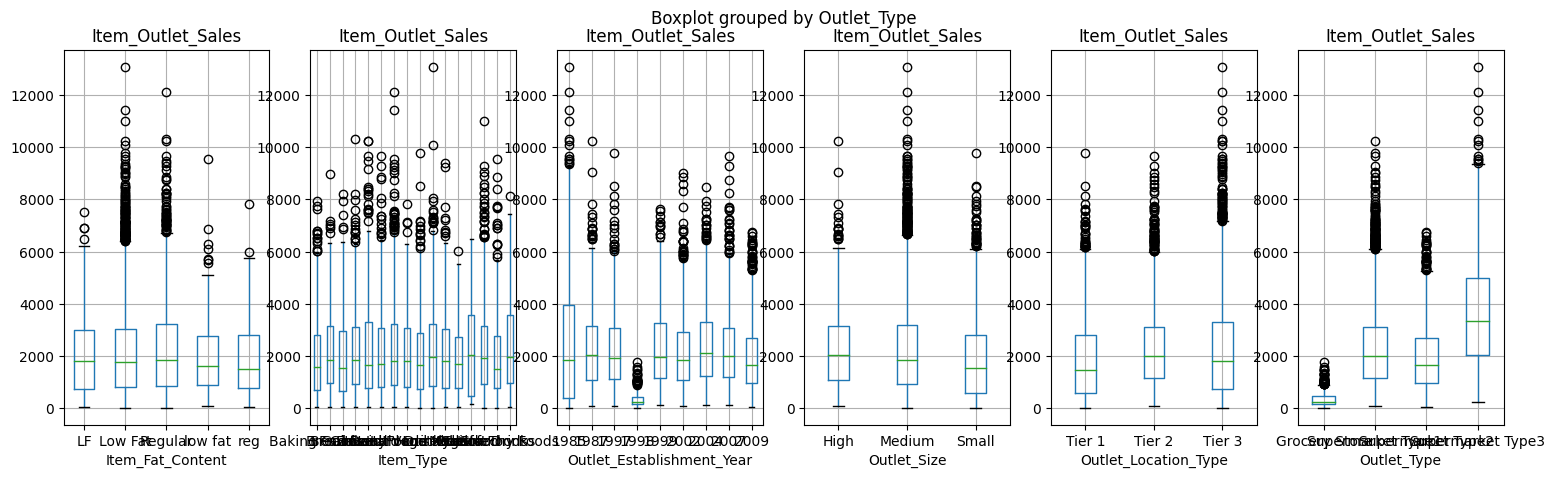

In [38]:
# Box plots for  Target Variable "Item_Outlet_Sales" and categorical predictors
CategoricalColsList=['Item_Fat_Content', 'Item_Type', 'Outlet_Establishment_Year', 'Outlet_Size','Outlet_Location_Type','Outlet_Type']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each categorical predictor against the Target Variable 
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    TrainData.boxplot(column='Item_Outlet_Sales', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

Box-Plots interpretation


These plots gives an idea about the data distribution of continuous target in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the categorical variable has NO effect on the target variable. Hence, the variables are not correlated to each other. (E.g.  Item_Fat_Content)

On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be correlated with price. (E.g Outlet_Type)


We confirm this by looking at the results of ANOVA test below

Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)

ANOVA Test result: Probability of H0 being true


In [39]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [40]:
# Calling the function to check which categorical variables are correlated with target
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['Item_Fat_Content', 'Item_Type', 'Outlet_Establishment_Year', 'Outlet_Size','Outlet_Location_Type','Outlet_Type']
FunctionAnova(inpData=TrainData, 
              TargetVariable='Item_Outlet_Sales', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

Item_Fat_Content is NOT correlated with Item_Outlet_Sales | P-Value: 0.14122147854932424
Item_Type is correlated with Item_Outlet_Sales | P-Value: 0.00038843993766501125
Outlet_Establishment_Year is correlated with Item_Outlet_Sales | P-Value: 6.744877880160888e-164
Outlet_Size is correlated with Item_Outlet_Sales | P-Value: 9.642803947830672e-19
Outlet_Location_Type is correlated with Item_Outlet_Sales | P-Value: 5.222817298884297e-24
Outlet_Type is correlated with Item_Outlet_Sales | P-Value: 0.0


['Item_Type',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

The results of ANOVA confirm our visual analysis using box plots above.

All categorical variables are correlated with the Target variable except "Item_Fat_Content". This is something we guessed by looking at the box plots!

Final selected Categorical columns:

'Item_Type','Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type'

Selecting final predictors for Machine Learning

Based on the above tests, selecting the final columns for machine learning

In [41]:
SelectedColumns=['Item_MRP','Item_Visibility','Item_Type','Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Selecting final columns
DataForML=TrainData[SelectedColumns]
DataForML.head()

,Item_MRP,Item_Visibility,Item_Type,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,249.8092,0.016047,Dairy,1999,Medium,Tier 1,Supermarket Type1
1,48.2692,0.019278,Soft Drinks,2009,Medium,Tier 3,Supermarket Type2
2,141.6180,0.016760,Meat,1999,Medium,Tier 1,Supermarket Type1
3,182.0950,0.000000,Fruits and Vegetables,1998,Medium,Tier 3,Grocery Store
4,53.8614,0.000000,Household,1987,High,Tier 3,Supermarket Type1


In [42]:
# Save this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

Data Pre-processing for Machine Learning

Convert each Ordinal Categorical columns to numeric (e.g. Outlet_Location_Type: Tier1, Tier2, Tier3)

Convert Binary nominal Categorical columns to numeric using 1/0 mapping (none in this dataset)

Convert all other nominal categorical columns to numeric using pd.get_dummies()

Data Transformation: Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

In [86]:
DataForML.Item_Type.unique()

array([ 8,  1,  2,  3,  4,  6,  5,  9, 10,  7, 11, 12, 13, 14, 15, 16],
      dtype=int64)

In [87]:
# Turning all categorical variables into numerical values can be done by mapping each categorical value with  
# respective FREQUENCY of the values in the column

cat_var = ['Item_Type','Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for i in cat_var:
    p  = DataForML[i].value_counts().to_dict()
    DataForML[i] = DataForML[i].map(p)

#View the result
DataForML    

,Item_MRP,Item_Visibility,Item_Type,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,249.8092,0.016047,682,930,5203,2388,5577,3735.1380
1,48.2692,0.019278,445,928,5203,3350,928,443.4228
2,141.6180,0.016760,425,930,5203,2388,5577,2097.2700
3,182.0950,0.000000,1232,555,5203,3350,1083,732.3800
4,53.8614,0.000000,910,932,932,3350,5577,994.7052
...,...,...,...,...,...,...,...,...
8518,214.5218,0.056783,1200,932,932,3350,5577,2778.3834
8519,108.1570,0.046982,648,929,5203,2785,5577,549.2850
8520,85.1224,0.035186,520,930,2388,2785,5577,1193.1136
8521,103.1332,0.145221,1200,928,5203,3350,928,1845.5976


In [88]:
# Add the target variable to the new dataset
# Adding Target Variable to the data
DataForML['Item_Outlet_Sales']=TrainData['Item_Outlet_Sales']
DataForML

,Item_MRP,Item_Visibility,Item_Type,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,249.8092,0.016047,682,930,5203,2388,5577,3735.1380
1,48.2692,0.019278,445,928,5203,3350,928,443.4228
2,141.6180,0.016760,425,930,5203,2388,5577,2097.2700
3,182.0950,0.000000,1232,555,5203,3350,1083,732.3800
4,53.8614,0.000000,910,932,932,3350,5577,994.7052
...,...,...,...,...,...,...,...,...
8518,214.5218,0.056783,1200,932,932,3350,5577,2778.3834
8519,108.1570,0.046982,648,929,5203,2785,5577,549.2850
8520,85.1224,0.035186,520,930,2388,2785,5577,1193.1136
8521,103.1332,0.145221,1200,928,5203,3350,928,1845.5976


Machine Learning: Splitting the data into Training and Testing sample

In [89]:
# Separate Target Variable and Predictor Variables
TargetVariable='Item_Outlet_Sales'
Predictors=['Item_MRP','Item_Visibility','Item_Type','Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

X=DataForML[Predictors].values
y=DataForML[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

Standardization/Normalization of data

In [90]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [91]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5966, 7)
(5966,)
(2557, 7)
(2557,)


Logistic Regression

In [93]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

# Taking the standardized values to original scale


from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Item_Outlet_Sales']-TestingDataResults['Predictedsales']))/TestingDataResults['Item_Outlet_Sales'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.4885486806995021

##### Model Validation and Accuracy Calculations ##########
   Item_Outlet_Sales  PredictedItem_Outlet_Sales
0          1743.0644                      1711.0
1           356.8688                       -10.0
2           377.5086                       638.0
3          5778.4782                      3834.0
4          2356.9320                      3112.0


KeyError: 'Predictedsales'

Multiple Linear regression gives a low prediction accuracy r2=0.488

KNN using k = 3

In [94]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedsales']))/TestingDataResults['Item_Outlet_Sales'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.7389513107124692

##### Model Validation and Accuracy Calculations ##########
   Item_Outlet_Sales  PredictedItem_Outlet_Sales
0          1743.0644                      1013.0
1           356.8688                       770.0
2           377.5086                       500.0
3          5778.4782                      4625.0
4          2356.9320                      2339.0


KeyError: 'price'

Accuracy increases to 0.74.

Deployment of the Model

Based on the above trials you select that algorithm which produces the best average accuracy. In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them.

I am choosing KNN as the final model since it is producing the best accuracy on this data.

In order to deploy the model we follow below steps

Train the model using 100% data available

Save the model as a serialized file which can be stored anywhere

Create a python function which gets integrated with front-end(Tableau/Java Website etc.) to take all the inputs and returns the prediction

In [95]:
# Separate Target Variable and Predictor Variables
TargetVariable='Item_Outlet_Sales'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['Item_MRP','Item_Visibility','Item_Type','Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

X=DataForML[Predictors].values
y=DataForML[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(8523, 7)
(8523,)


In [96]:
# Model cross-validation
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Using final hyperparameters
# Using KNN
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.7389513107124692


NameError: name 'custom_Scoring' is not defined

In [99]:
# Training the model on 100% Data available
Sales_Model=RegModel.fit(X,y)

In [100]:
# Save the model as a serialized file which can be stored anywhere
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Sales_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Sales_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: e:\Documents\Personal Learning\AI Undergrad 2023\Lectures\Big Mart Sales


In [103]:
# Create a python function that can be called to use the save prediction model
#This Function can be called from any from any front end tool/website
def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]
    
    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('Sales_Model.pkl')
    InputData=InputData.append(DataForML)
    
    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)
            
    # Maintaining the same order of columns as it was during the model training
    Predictors=['Item_MRP','Item_Visibility','Item_Type','Outlet_Establishment_Year', 'Outlet_Size', 
                'Outlet_Location_Type', 'Outlet_Type']
    
    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('Sales_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # Genprice Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(round(PredictionResult))

In [105]:
# Calling the function for some new data
TestData = pd.read_csv('E:/Documents/Personal Learning/AI Undergrad 2023/Lectures/Big Mart Sales/Test.csv', encoding='latin')

print(TestData)



     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58       20.750          Low Fat         0.007565   
1              FDW14        8.300              reg         0.038428   
2              NCN55       14.600          Low Fat         0.099575   
3              FDQ58        7.315          Low Fat         0.015388   
4              FDY38          NaN          Regular         0.118599   
...              ...          ...              ...              ...   
5676           FDB58       10.500          Regular         0.013496   
5677           FDD47        7.600          Regular         0.142991   
5678           NCO17       10.000          Low Fat         0.073529   
5679           FDJ26       15.300          Regular         0.000000   
5680           FDU37        9.500          Regular         0.104720   

               Item_Type  Item_MRP Outlet_Identifier  \
0            Snack Foods  107.8622            OUT049   
1                  Dairy   87.3198 

In [106]:
# Deleting those columns which are not useful in predictive analysis because these variables are qualitative
UselessColumns = ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Outlet_Identifier']
TestData = TestData.drop(UselessColumns,axis=1)
TestData.head()


,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,0.038428,Dairy,87.3198,2007,NaN,Tier 2,Supermarket Type1
2,0.099575,Others,241.7538,1998,NaN,Tier 3,Grocery Store
3,0.015388,Snack Foods,155.0340,2007,NaN,Tier 2,Supermarket Type1
4,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3


In [109]:
# Turning all categorical variables into numerical values can be done by mapping each categorical value  

cat_var = ['Item_Type','Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for i in cat_var:
    p  = TestData[i].value_counts().to_dict()
    TestData[i] = TestData[i].map(p)

#View the result
TestData    

,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.007565,789,107.8622,620,1862.0,1592,3717
1,0.038428,454,87.3198,617,NaN,1856,3717
2,0.099575,111,241.7538,370,NaN,2233,722
3,0.015388,789,155.0340,617,NaN,1856,3717
4,0.118599,454,234.2300,976,1862.0,2233,624
...,...,...,...,...,...,...,...
5676,0.013496,789,141.3154,620,1592.0,1592,3717
5677,0.142991,121,169.1448,618,1862.0,2233,618
5678,0.073529,338,118.7440,619,NaN,1856,3717
5679,0.000000,435,214.6218,617,NaN,1856,3717


In [ ]:
# Calling the Function for prediction
FunctionPredictResult(InputData= TestData)